## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.130894  0.277815 -1.311637  0.751462 -0.536306  1.594549
1  0.095626  0.824415 -0.889072 -0.377584  0.322054  0.645213
2 -1.507375  1.689752 -1.560908 -0.655483  0.156572 -0.508798
3  1.570492 -0.912848  1.378455 -1.042092 -0.480844 -0.272328
4 -0.956388 -0.543023  1.573766 -0.279836 -1.200594 -0.775824


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9894901	total: 65.5ms	remaining: 1m 5s
1:	learn: 0.9790053	total: 66ms	remaining: 32.9s
2:	learn: 0.9695922	total: 66.7ms	remaining: 22.2s
3:	learn: 0.9603168	total: 67.3ms	remaining: 16.8s
4:	learn: 0.9529398	total: 67.9ms	remaining: 13.5s
5:	learn: 0.9451086	total: 68.5ms	remaining: 11.3s
6:	learn: 0.9356025	total: 69ms	remaining: 9.79s
7:	learn: 0.9266320	total: 69.5ms	remaining: 8.62s
8:	learn: 0.9196764	total: 70.2ms	remaining: 7.73s
9:	learn: 0.9121858	total: 70.7ms	remaining: 6.99s
10:	learn: 0.9036055	total: 71.1ms	remaining: 6.39s
11:	learn: 0.8947919	total: 71.7ms	remaining: 5.9s
12:	learn: 0.8853495	total: 72.2ms	remaining: 5.48s
13:	learn: 0.8787074	total: 72.6ms	remaining: 5.11s
14:	learn: 0.8718477	total: 73.1ms	remaining: 4.8s
15:	learn: 0.8643771	total: 73.5ms	remaining: 4.52s
16:	learn: 0.8563519	total: 74ms	remaining: 4.28s
17:	learn: 0.8481735	total: 74.4ms	remaining: 4.06s
18:	learn: 0.8414730	total: 75ms	remaining: 3.87s
19

89:	learn: 0.4670047	total: 108ms	remaining: 1.09s
90:	learn: 0.4631198	total: 108ms	remaining: 1.08s
91:	learn: 0.4595175	total: 109ms	remaining: 1.07s
92:	learn: 0.4559317	total: 109ms	remaining: 1.06s
93:	learn: 0.4518575	total: 110ms	remaining: 1.06s
94:	learn: 0.4481870	total: 110ms	remaining: 1.05s
95:	learn: 0.4453471	total: 111ms	remaining: 1.04s
96:	learn: 0.4422582	total: 111ms	remaining: 1.03s
97:	learn: 0.4386356	total: 111ms	remaining: 1.02s
98:	learn: 0.4349830	total: 112ms	remaining: 1.02s
99:	learn: 0.4314519	total: 112ms	remaining: 1.01s
100:	learn: 0.4289925	total: 113ms	remaining: 1s
101:	learn: 0.4255545	total: 113ms	remaining: 996ms
102:	learn: 0.4224839	total: 114ms	remaining: 989ms
103:	learn: 0.4191799	total: 114ms	remaining: 982ms
104:	learn: 0.4161155	total: 114ms	remaining: 975ms
105:	learn: 0.4136597	total: 115ms	remaining: 968ms
106:	learn: 0.4107878	total: 115ms	remaining: 961ms
107:	learn: 0.4075047	total: 116ms	remaining: 955ms
108:	learn: 0.4042692	tota

252:	learn: 0.1514772	total: 187ms	remaining: 553ms
253:	learn: 0.1505250	total: 188ms	remaining: 552ms
254:	learn: 0.1496573	total: 188ms	remaining: 550ms
255:	learn: 0.1486086	total: 189ms	remaining: 549ms
256:	learn: 0.1478017	total: 189ms	remaining: 547ms
257:	learn: 0.1468549	total: 190ms	remaining: 545ms
258:	learn: 0.1459203	total: 190ms	remaining: 544ms
259:	learn: 0.1448120	total: 191ms	remaining: 542ms
260:	learn: 0.1438693	total: 191ms	remaining: 541ms
261:	learn: 0.1429316	total: 192ms	remaining: 540ms
262:	learn: 0.1421720	total: 192ms	remaining: 538ms
263:	learn: 0.1412835	total: 192ms	remaining: 537ms
264:	learn: 0.1402817	total: 193ms	remaining: 535ms
265:	learn: 0.1392781	total: 193ms	remaining: 534ms
266:	learn: 0.1386107	total: 194ms	remaining: 532ms
267:	learn: 0.1376722	total: 194ms	remaining: 530ms
268:	learn: 0.1366441	total: 195ms	remaining: 529ms
269:	learn: 0.1358687	total: 195ms	remaining: 527ms
270:	learn: 0.1350183	total: 195ms	remaining: 526ms
271:	learn: 

475:	learn: 0.0412251	total: 291ms	remaining: 320ms
476:	learn: 0.0410044	total: 292ms	remaining: 320ms
477:	learn: 0.0407655	total: 292ms	remaining: 319ms
478:	learn: 0.0405515	total: 293ms	remaining: 318ms
479:	learn: 0.0403432	total: 293ms	remaining: 318ms
480:	learn: 0.0401038	total: 294ms	remaining: 317ms
481:	learn: 0.0398769	total: 294ms	remaining: 316ms
482:	learn: 0.0397757	total: 295ms	remaining: 315ms
483:	learn: 0.0396332	total: 295ms	remaining: 315ms
484:	learn: 0.0395037	total: 296ms	remaining: 314ms
485:	learn: 0.0394047	total: 296ms	remaining: 313ms
486:	learn: 0.0391772	total: 297ms	remaining: 313ms
487:	learn: 0.0390544	total: 297ms	remaining: 312ms
488:	learn: 0.0389577	total: 298ms	remaining: 311ms
489:	learn: 0.0387435	total: 298ms	remaining: 310ms
490:	learn: 0.0385703	total: 299ms	remaining: 310ms
491:	learn: 0.0384705	total: 299ms	remaining: 309ms
492:	learn: 0.0383019	total: 300ms	remaining: 308ms
493:	learn: 0.0381370	total: 300ms	remaining: 308ms
494:	learn: 

641:	learn: 0.0214846	total: 371ms	remaining: 207ms
642:	learn: 0.0213889	total: 371ms	remaining: 206ms
643:	learn: 0.0212959	total: 372ms	remaining: 206ms
644:	learn: 0.0212588	total: 372ms	remaining: 205ms
645:	learn: 0.0211336	total: 373ms	remaining: 204ms
646:	learn: 0.0210869	total: 373ms	remaining: 204ms
647:	learn: 0.0209642	total: 374ms	remaining: 203ms
648:	learn: 0.0209185	total: 374ms	remaining: 202ms
649:	learn: 0.0208357	total: 375ms	remaining: 202ms
650:	learn: 0.0207882	total: 375ms	remaining: 201ms
651:	learn: 0.0206982	total: 376ms	remaining: 201ms
652:	learn: 0.0206623	total: 376ms	remaining: 200ms
653:	learn: 0.0205727	total: 377ms	remaining: 199ms
654:	learn: 0.0204542	total: 377ms	remaining: 199ms
655:	learn: 0.0204134	total: 378ms	remaining: 198ms
656:	learn: 0.0203783	total: 378ms	remaining: 198ms
657:	learn: 0.0202916	total: 379ms	remaining: 197ms
658:	learn: 0.0202052	total: 380ms	remaining: 196ms
659:	learn: 0.0200900	total: 380ms	remaining: 196ms
660:	learn: 

859:	learn: 0.0092344	total: 475ms	remaining: 77.4ms
860:	learn: 0.0091981	total: 476ms	remaining: 76.8ms
861:	learn: 0.0091653	total: 477ms	remaining: 76.3ms
862:	learn: 0.0091320	total: 477ms	remaining: 75.7ms
863:	learn: 0.0090994	total: 477ms	remaining: 75.1ms
864:	learn: 0.0090518	total: 478ms	remaining: 74.6ms
865:	learn: 0.0090104	total: 478ms	remaining: 74ms
866:	learn: 0.0089764	total: 479ms	remaining: 73.4ms
867:	learn: 0.0089614	total: 479ms	remaining: 72.9ms
868:	learn: 0.0089269	total: 480ms	remaining: 72.3ms
869:	learn: 0.0088985	total: 480ms	remaining: 71.7ms
870:	learn: 0.0088650	total: 481ms	remaining: 71.2ms
871:	learn: 0.0088299	total: 481ms	remaining: 70.6ms
872:	learn: 0.0087847	total: 481ms	remaining: 70ms
873:	learn: 0.0087598	total: 482ms	remaining: 69.5ms
874:	learn: 0.0087424	total: 482ms	remaining: 68.9ms
875:	learn: 0.0087151	total: 483ms	remaining: 68.3ms
876:	learn: 0.0086738	total: 483ms	remaining: 67.7ms
877:	learn: 0.0086408	total: 484ms	remaining: 67.2

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

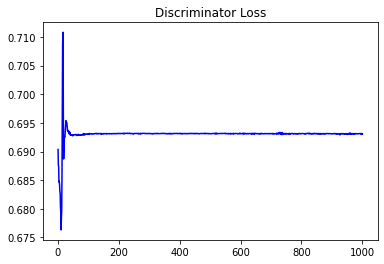

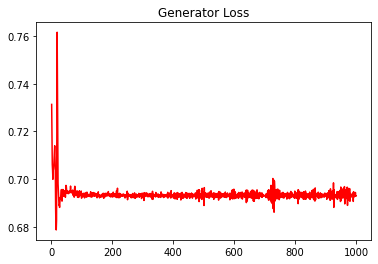

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.09534019413416074


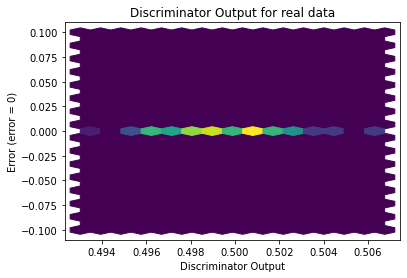

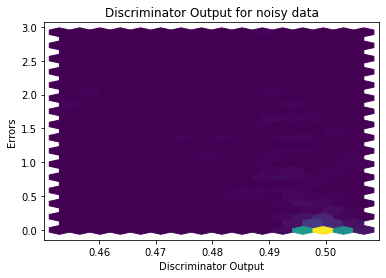

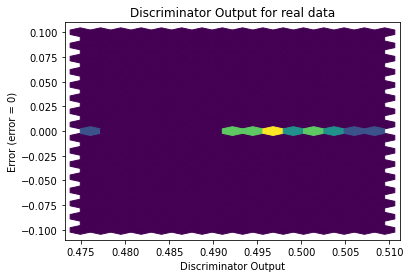

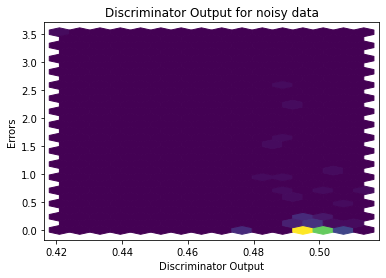

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


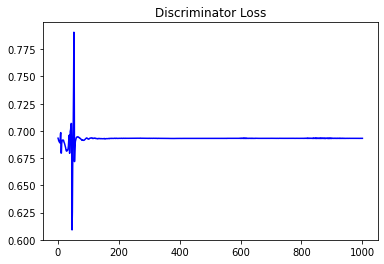

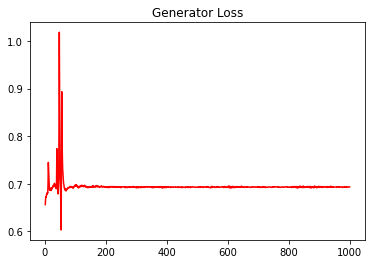

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.16114250637968092


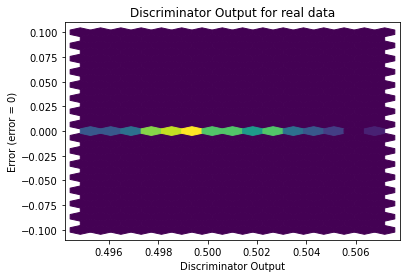

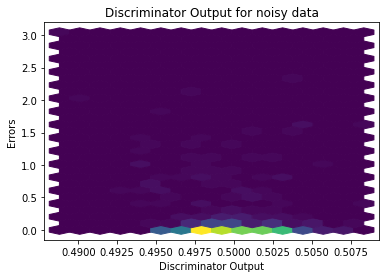

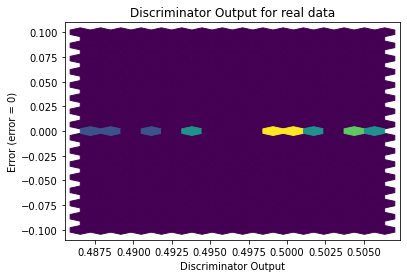

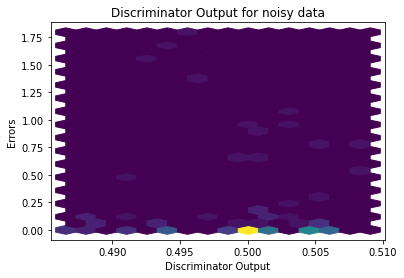

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2346]], requires_grad=True)
